In [ ]:
import sys
!{sys.executable} -m pip install numpy matplotlib scikit-image opencv-python-headless
/Users/dtarunkumar/Untitled-1.ipynb


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import threshold_otsu, threshold_sauvola
from skimage.color import rgb2gray


In [3]:
def dice_score(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2.0 * intersection) / (np.sum(y_true) + np.sum(y_pred) + 1e-7)

def jaccard_index(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return intersection / (union + 1e-7)


In [5]:
IMAGE_DIR = r"/Users/dtarunkumar/Desktop/untitled folder/archive (2)/images"
MASK_DIR  = r"/Users/dtarunkumar/Desktop/untitled folder/archive (2)/masks"

BASE_DIR = "/Users/dtarunkumar/Desktop/untitled folder/archive (2)"

IMAGE_DIR = os.path.join(BASE_DIR, "images")
MASK_DIR  = os.path.join(BASE_DIR, "masks")


In [6]:
def preprocess_image(image_path, mask_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray  = rgb2gray(image)

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = (mask > 0).astype(np.uint8)

    return gray, mask


In [7]:
def otsu_segmentation(gray_image):
    threshold = threshold_otsu(gray_image)
    segmented = gray_image > threshold
    return segmented.astype(np.uint8)


In [8]:
def sauvola_segmentation(gray_image, window_size=25):
    threshold = threshold_sauvola(gray_image, window_size=window_size)
    segmented = gray_image > threshold
    return segmented.astype(np.uint8)


In [10]:
import os

# macOS absolute base directory
BASE_DIR = "/Users/dtarunkumar/Desktop/untitled folder/archive (2)"

IMAGE_DIR = os.path.join(BASE_DIR, "images")
MASK_DIR  = os.path.join(BASE_DIR, "masks")

image_files = sorted(os.listdir(IMAGE_DIR))
mask_files  = sorted(os.listdir(MASK_DIR))

dice_otsu, dice_sauvola = [], []
jac_otsu, jac_sauvola = [], []

while_idx = 0
while while_idx < len(image_files):
    img_path  = os.path.join(IMAGE_DIR, image_files[while_idx])
    mask_path = os.path.join(MASK_DIR, mask_files[while_idx])

    gray, gt_mask = preprocess_image(img_path, mask_path)

    otsu_mask    = otsu_segmentation(gray)
    sauvola_mask = sauvola_segmentation(gray)

    dice_otsu.append(dice_score(gt_mask, otsu_mask))
    dice_sauvola.append(dice_score(gt_mask, sauvola_mask))

    jac_otsu.append(jaccard_index(gt_mask, otsu_mask))
    jac_sauvola.append(jaccard_index(gt_mask, sauvola_mask))

    while_idx += 1

print("Processing completed successfully ✅")


Processing completed successfully ✅


In [11]:
print("===== AVERAGE PERFORMANCE =====")
print("Otsu Dice Score     :", round(np.mean(dice_otsu), 4))
print("Sauvola Dice Score  :", round(np.mean(dice_sauvola), 4))
print()
print("Otsu Jaccard Index  :", round(np.mean(jac_otsu), 4))
print("Sauvola Jaccard     :", round(np.mean(jac_sauvola), 4))


===== AVERAGE PERFORMANCE =====
Otsu Dice Score     : 0.0707
Sauvola Dice Score  : 0.0463

Otsu Jaccard Index  : 0.0376
Sauvola Jaccard     : 0.0241


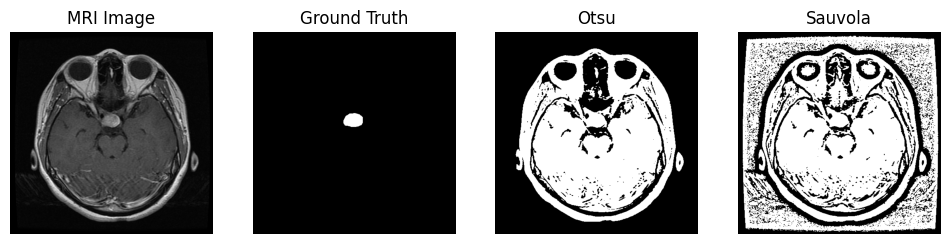

In [12]:
index = 5   # change index if needed

gray, gt = preprocess_image(
    os.path.join(IMAGE_DIR, image_files[index]),
    os.path.join(MASK_DIR, mask_files[index])
)

otsu_result = otsu_segmentation(gray)
sauvola_result = sauvola_segmentation(gray)

plt.figure(figsize=(12, 8))

plt.subplot(1, 4, 1)
plt.title("MRI Image")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Ground Truth")
plt.imshow(gt, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Otsu")
plt.imshow(otsu_result, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Sauvola")
plt.imshow(sauvola_result, cmap='gray')
plt.axis('off')

plt.show()
